In [2]:
import json
import numpy as np
import matplotlib.pyplot as plt

In [31]:
nus = [0., .5, 1.]
experiments = [
    'results_nu_0.json',
    'results_nu_0.5.json',
    'results_nu_1.json',
]

In [32]:
plt.rc('text', usetex=True)
plt.rc('font', size=36, **{'family': 'sans-serif', 'sans-serif': ['Helvetica']})
plt.rcParams['xtick.major.pad'] = 8
plt.rcParams['ytick.major.pad'] = 8
plt.rcParams['savefig.bbox'] = 'tight'

In [33]:
fontsize = 36
legendsize = 18

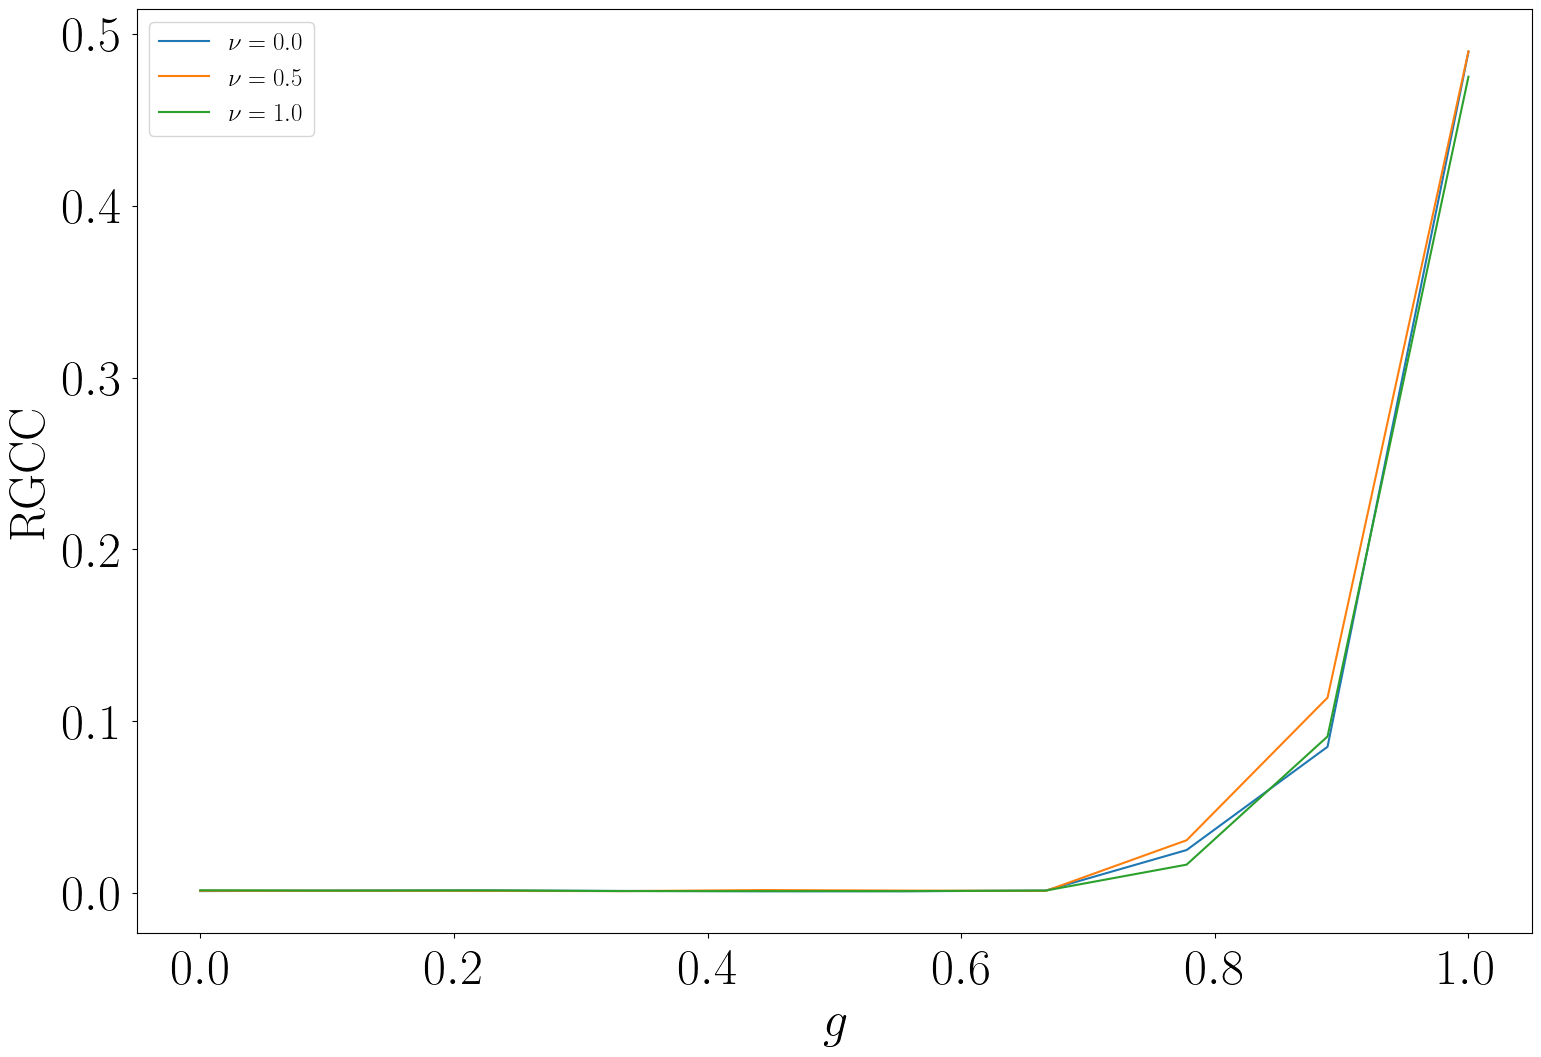

In [52]:
plt.subplots(figsize=(18, 12))
for nu, experiment in zip(nus, experiments):
    with open(experiment, 'r') as f:
        results = json.load(f)
    N = results['N']
    grange = np.linspace(*results['grange'])
    nruns = results['nruns']
    results = results['results']
    
    rgcc = []
    for res in results:
        rgcc.append(np.mean([run['rgcc_size'] for run in res['runs']]) / N)

    plt.plot(grange[:len(rgcc)], rgcc, label=fr'$\nu = {nu}$')

plt.legend(fontsize=legendsize, loc='upper left')
plt.xlabel(fr'$g$', fontdict={'size': fontsize})
plt.ylabel(fr'$\mathrm{{RGCC}}$', fontdict={'size': fontsize})
plt.savefig('rgcc_correlation_percolation.pdf')

In [38]:
np.array(rgcc) * N

array([ 1.2,  1.4,  1.3,  1.3,  1.4,  1.5,  1.4,  1.5,  4.3, 47.1])